In [27]:
import pandas as pd

## Create datasets

In [7]:
df = pd.read_csv('ETTh1.csv', header=0)

display(df.head())

df['date'] = pd.to_datetime(df['date'])
# drop date
df = df.drop(columns=['date'])
display(df.head())

# write to csv
df.to_csv('ETTh1-clean.csv', index=False, header=False)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df = pd.read_csv('rcalix.csv', header=0)
display(df.head())
print(df.shape)

# remove first column, it's just an index
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# drop any column with the min and max being the same.
# this will cause a division by zero error
# df = df.loc[:, (df != df.iloc[0]).any()] # does this remove the first row?
df = df.loc[:, (df.min() != df.max())]

display(df.head())
print(df.shape)

# split some of the end for testing
df_train = df.iloc[:int(df.shape[0] * 0.95)]
df_test = df.iloc[int(df.shape[0] * 0.95):]

# get number of values in each df
print(len(df_train.values.flatten()))
print(len(df_test.values.flatten()))

df_train.to_csv('rcalix-clean-train.csv', index=False, header=False)
df_test.to_csv('rcalix-clean-test.csv', index=False, header=False)

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0,0.000000,0.0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,1,0.000000,0.0,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,2,-0.044380,0.0,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,3,0.009040,0.0,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,4,0.101686,0.0,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 37)


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,45,0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.0,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,43,8,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.0,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,17,10,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.0,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,40,12,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.0,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,6,15,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 34)
45016
2380


## Dist of values

,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,17017,20116,5996,5679,47424,34010,29863,0,38330,0,...,7347,20122,23748,31699,50254,33577,32852,0,43782,1291
1,17017,20116,5831,5486,48659,34118,31256,0,36626,17480,...,7330,13827,21551,22531,50255,32564,33702,0,43782,1291
2,16469,20116,5021,5350,48575,34420,31061,0,14480,21850,...,8016,11454,24449,23636,50255,32540,32750,50255,43769,1291
3,17128,20116,5186,5335,48430,34950,31174,0,34071,26220,...,5830,8565,21223,20212,50255,32363,33569,0,42673,1291
4,18271,20116,7043,5334,48323,35258,31196,0,5110,32775,...,6615,9837,21551,19218,50255,32554,33020,50255,44275,1291


(1394, 34)
delta_SI                      1
mov_avg_SI                    1
SI_f1                         1
HOST_BLAST_MOISTURE_f3        1
HOT_BLAST_TMP_NS_f3           1
NAT_GAS _INJECTION_f3         2
WINDRATE_f3                   1
HIGH_PURITY_OXYGEN_f3       898
min                          93
hour                         94
day                          51
month                       242
year                       1152
COAL_FLOW_f3               1385
Cast_Avg_Mn_f2                1
Slag_Fe_f2                    3
CNUM                          1
Selec_Top_Gas_CO_f3           1
Selec_Top_Gas_CO2_f3          1
Selec_Top_Gas_H2_f3           1
Selec_Top_Gas_N2_f3           1
NE_Uptake_f3                  1
SE_Uptake_f3                  1
NW_Uptake_f3                  1
SW_Uptake_f3                  1
Slag_SiO2_f2                  1
Slag_CaO_f2                   1
Slag_MgO_f2                   1
SNORT_VALVE_POSITION_f3       1
TOP_PRESS_f3                  1
HOT_BLAST_PRESSURE_f3        

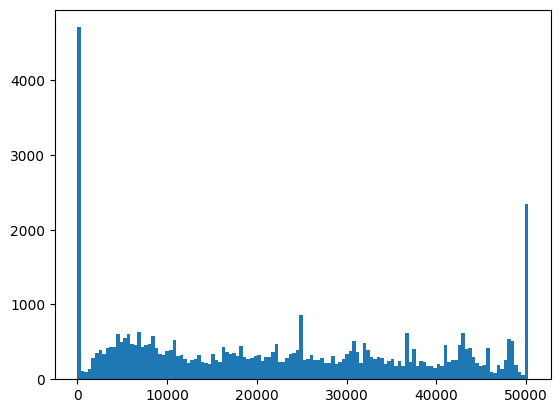

In [17]:
import matplotlib.pyplot as plt

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )

# convert to int
norm_df = norm_df.astype(int)

display(norm_df.head())
print(norm_df.shape)

values = norm_df.values.flatten()

print((norm_df <= 2).sum())

# get histogram of the data
plt.hist(values, bins=128)
plt.show()

## Weird warning issue

In [42]:
import warnings

df = pd.read_csv('rcalix-clean-test.csv', header=None)

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )
# print(f"{df.min()} {df.max()}")

display(norm_df.head())

# TODO should give more info
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    for i, v in enumerate(norm_df.values.flatten()):
        try:
            token = v.astype(int)
        except RuntimeWarning:
            print(f'Error at {i} with value {v}')
            v2 = df.values.flatten()[i]
            # print min and max of the column
            mi = df.iloc[i % df.shape[0]].min()
            ma = df.iloc[i % df.shape[0]].max()
            print(mi, ma)
            norm = (v2 - mi) * (50_257-2) / ( ma - mi )
            print(f'Original value: {v2} Normalized value: {norm}')
            break

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,19175.053038,17384.838167,11682.548356,50255.000000,49377.490037,19881.127112,48451.245413,0.0,8517.796610,24035.0,...,16836.851391,42782.679584,22859.640815,38582.883430,50255.0,45193.220503,42530.985909,0.0,24207.090955,47861.904762
1,18945.244374,16477.206735,9706.057015,49199.534331,49155.441597,18211.232301,49134.373655,0.0,36626.525424,28405.0,...,18490.044123,43808.287195,21045.408946,44094.724054,50255.0,44969.568081,39498.773975,50255.0,17909.390283,47861.904762
2,20381.728943,28141.016525,9430.637503,49419.819226,49260.835170,19280.579291,48503.529757,0.0,38330.084746,30590.0,...,19270.953558,44614.129858,9978.414157,30153.006173,50255.0,45253.298942,37288.013674,0.0,0.000000,47861.904762
3,22795.063509,30350.064283,12013.066610,48600.401092,49185.271329,19914.316583,48861.802228,0.0,34071.186441,41515.0,...,22811.835552,49082.872996,17054.015452,35340.613444,50255.0,45081.744294,39497.930569,0.0,11435.126412,47861.904762
4,20046.855438,17507.254052,11341.092970,48318.513443,48320.550744,13617.988415,48846.011903,0.0,10221.355932,45885.0,...,10654.163938,13552.720896,3628.533041,0.000000,50255.0,45056.128070,41840.488196,0.0,20812.015426,47861.904762


Error at 11 with value nan
0.0 9094.439984472729
Original value: 12.0 Normalized value: 66.31084498106827


## Stride test

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
2,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
4,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35


32681


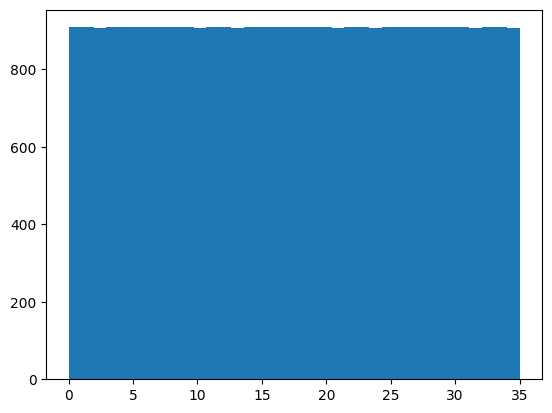

,value,count
0,0,908
1,1,908
2,2,907
3,3,908
4,4,908
5,5,908
6,6,908
7,7,908
8,8,908
9,9,908


In [26]:
import numpy as np
import pandas as pd

# create row of 35 values from 0 to 34
row = np.arange(36)

# repeat a bunch of times
df = pd.DataFrame(np.tile(row, (10000, 1)))

display(df.head())

tokens = df.values.flatten()

dataset = []
real = []
max_length = 512
stride = 11 # 64 -> 3 7 11 15 19 23 27 31 35
for i in range(0, len(tokens) - max_length, stride):
    sequence = tokens[i:i + max_length]
    if len(sequence) == max_length:
        input_sequence = np.array(sequence[:-1])#, dtype=np.int64) # dont include the last token
        target_sequence = np.array(sequence[1:])#, dtype=np.int64) # dont include the first token

        dataset.append({
            'input_ids': input_sequence,
            'labels': target_sequence
        })
        real.append(target_sequence[-1])

print(len(dataset))

# get the distribution of the last token and put in histogram
import matplotlib.pyplot as plt
plt.hist(real, bins=36)
plt.show()

# check distribution of dataset values
# if the distribution is the same as the original dataset, then the dataset is good
# if the dist of the last is equal, then the dataset should follow

# put unique values in a dataframe
unique = set(real)
df = pd.DataFrame(real, columns=['value'])
df['count'] = 1
df = df.groupby('value').count().reset_index()
# df.drop(columns=['value'], inplace=True)
display(df)


samples: 1513


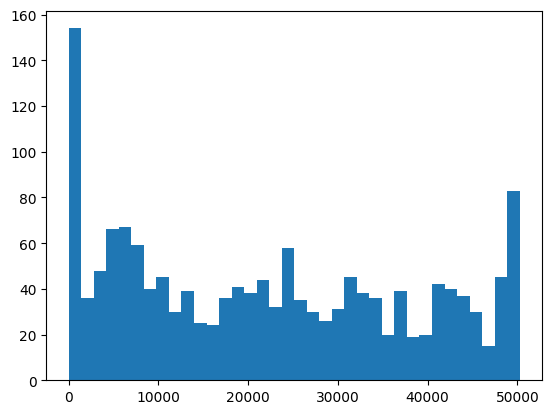

,value,count
0,0,142
1,18,1
2,601,1
3,704,1
4,851,1
...,...,...
1148,49528,1
1149,49665,1
1150,49931,1
1151,50254,7


In [23]:
import pandas as pd
import numpy as np

samples_per_file = None
max_length = 512
stride = 31
dataset = []
real = []

df = pd.read_csv('rcalix-clean.csv', header=None)
df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# # only get first row
# df = df.iloc[:, 0]

norm_df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )
n_cols = 1#norm_df.shape[1]

tokens = norm_df.values.flatten().astype(int)

# Create sequences with sliding window
samples = 0
for i in range(0, len(tokens) - max_length, stride):
    sequence = tokens[i:i + max_length]
    if len(sequence) == max_length:
        input_sequence = np.array(sequence[:-n_cols])#, dtype=np.int64) # dont include the last token
        target_sequence = np.array(sequence[n_cols:])#, dtype=np.int64) # dont include the first token

        dataset.append({
            'input_ids': input_sequence,
            'labels': target_sequence
        })

        real.append(sequence[-1])

    samples += 1
    if samples_per_file is not None and samples >= samples_per_file: # 1024
        print('max samples from file')
        break
print('samples:', samples)

import matplotlib.pyplot as plt
plt.hist(real, bins=36)
plt.show()

# check distribution of dataset values
# if the distribution is the same as the original dataset, then the dataset is good
# if the dist of the last is equal, then the dataset should follow

# put unique values in a dataframe
unique = set(real)
df = pd.DataFrame(real, columns=['value'])
df['count'] = 1
df = df.groupby('value').count().reset_index()
# df.drop(columns=['value'], inplace=True)
display(df)

In [46]:
df = pd.read_csv('rcalix.csv', header=0)
display(df.head())
print(df.shape)

# remove first column, it's just an index
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna() # i think axis=1 drops columns
# drop any columns with str
df = df.drop(df.select_dtypes(['object']), axis=1)

# drop any column with the min and max being the same.
# this will cause a division by zero error
# df = df.loc[:, (df != df.iloc[0]).any()] # does this remove the first row?
df = df.loc[:, (df.min() != df.max())]

df = (df - df.min()) * (50_257-2) / ( df.max() - df.min() )

display(df.head())
print(df.shape)

# split some of the end for testing
df_train = df.iloc[:int(df.shape[0] * 0.85)]
df_eval = df.iloc[int(df.shape[0] * 0.85):int(df.shape[0] * 0.95)]
df_test = df.iloc[int(df.shape[0] * 0.95):]

# get number of values in each df
print(len(df_train.values.flatten()))
print(len(df_eval.values.flatten()))
print(len(df_test.values.flatten()))

df_train.to_csv('rcalix-clean-train.csv', index=False, header=False)
df_eval.to_csv('rcalix-clean-eval.csv', index=False, header=False)
df_test.to_csv('rcalix-clean-test.csv', index=False, header=False)

,Unnamed: 0,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0,0.000000,0.0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,...,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,1,0.000000,0.0,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,...,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,2,-0.044380,0.0,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,...,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,3,0.009040,0.0,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,...,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,4,0.101686,0.0,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,...,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0


(1394, 37)


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,min,hour,...,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,17017.081106,20116.861162,5996.515919,5679.330698,47424.090261,34010.109458,29863.694993,0.0,38330.084746,0.0,...,7347.502269,20122.632501,23748.400046,31699.305116,50255.0,33577.961028,32852.442374,0.0,43782.025432,1291.600467
1,17017.081106,20116.861162,5831.966076,5486.787325,48659.302335,34118.037535,31256.685723,0.0,36626.525424,17480.0,...,7330.925208,13827.865481,21551.216805,22531.910732,50255.0,32564.444362,33702.715393,0.0,43782.025432,1291.600467
2,16469.448766,20116.861162,5021.843425,5350.506006,48575.948988,34420.856667,31061.079010,0.0,14480.254237,21850.0,...,8016.976266,11454.417728,24449.639710,23636.420389,50255.0,32540.222242,32750.189245,50255.0,43769.203968,1291.600467
3,17128.628434,20116.861162,5186.857451,5335.214420,48430.128314,34950.802150,31174.913289,0.0,34071.186441,26220.0,...,5830.348888,8565.012815,21223.976394,20212.448870,50255.0,32363.542754,33569.833008,0.0,42673.998074,1291.600467
4,18271.844902,20116.861162,7043.052743,5334.071324,48323.159150,35258.176880,31196.803624,0.0,5110.677966,32775.0,...,6615.825630,9837.736116,21551.216805,19218.392277,50255.0,32554.305584,33020.512543,50255.0,44275.121550,1291.600467


(1394, 34)
40256
4760
2380
